# Fourier Transforms

In this notebook, we take a look at the Fourier Series representation of periodic signals, the Fourier Transfrom, the frequency domain, and the Fast Fourier Transform


In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interact
# workaround function for interact implementation
def showInInteract():
    import inspect
    for i in range(5):
        if 'interaction.py' in inspect.stack()[i][1]: plt.show()

## The Fourier Series Representation of a Periodic Signal

Before we talk about the Fourier Transform, we must first be introduced to the Fourier Series. This will allow us to represent any periodic signal as a series of sines and cosines in the following way:

Let $f(t)$ be a periodic signal:
$$
f(t)=f(t+nT),n∈Z.
$$

$T$ is the fundamental period (the time required for one complete cycle of signal to pass in a given point).

#### Fourier Series:
$$
f(t) = \frac{a_0}{2} + \sum_{n=1}^{\infty} a_n \cos(n \omega_0 t) + b_n \sin(n \omega_o t)
$$
$$
\omega_0 =\frac{2\pi}{T}
$$

##### $f_0 = 2\pi\omega_0$ is the fundamental frequency

##### $a_n$ and $b_n$ are the coefficients of the Fourier Series and are defined as:
$$
a_n = \frac{2}{T}\int_{-T/2}^{T/2} f(t)\cos(n \omega_0 t)dt
$$

$$
b_n = \frac{2}{T}\int_{-T/2}^{T/2} f(t)\sin(n \omega_0 t)dt
$$

##### $a_0$ is the average value of the signal:

$$
a_0 = \frac{2}{T}\int_{-T/2}^{T/2} f(t)dt
$$


Note that for a function with period $T$, the frequencies of the sines and cosines are:

$$
\frac{1}{T},\frac{2}{T},\frac{3}{T},…,
$$

They are multiples of the fundamental frequency $\frac{1}{T}$, which is the inverse period duration of the function. Therefore the frequency $\frac{n}{T}$ is called the nth harmonic and the frequencies are all integer multiples of the fundamental frequency.


## Using the Fourier Series to Represent a Square Wave

Now, lets verify the calculation of the Fourier coefficients and the function reconstruction numerically. First, we define a periodic square wave function with period $T$=1 that we want to expand into a Fourier series:

Text(0.5,1,'Square Wave (Rect Function)')

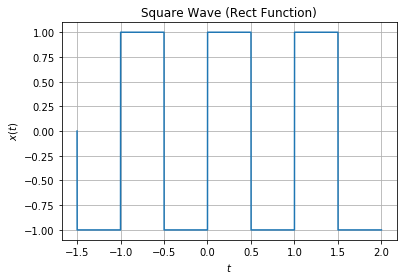

In [2]:
Fs = 10000
"""rect function"""
square_wave = lambda t: (abs((t%1)-0.25) < 0.25).astype(float) - (abs((t%1)-0.75) < 0.25).astype(float)
t = np.arange(-1.5, 2, 1/Fs)
plt.plot(t, square_wave(t))
plt.xlabel('$t$'); plt.ylabel('$x(t)$'); plt.grid(True); plt.ylim((-1.1, 1.1)); plt.title("Square Wave (Rect Function)")

In [3]:
"""Calculate the Fourier series coefficients up to the Nth harmonic"""
def fourierseries(period, N):
    result = []
    T = len(period)
    t = np.arange(T)
    for n in range(N+1):
        an = 2/T*(period * np.cos(2*np.pi*n*t/T)).sum()
        bn = 2/T*(period * np.sin(2*np.pi*n*t/T)).sum()
        result.append((an, bn))
    return np.array(result)

Now lets look at the reconstruction of the square wave, i.e. we calculate $f(t)$ from its Fourier Series coefficients up to a given order.

In [4]:
"""Calculates FS coefficents up to a given order to reconstruct a signal"""
def reconstruct(P, anbn):
    result = 0
    t = np.arange(P)
    for n, (a, b) in enumerate(anbn):
        if n == 0:
            a = a/2
        result = result + a*np.cos(2*np.pi*n*t/P) + b * np.sin(2*np.pi*n*t/P)
    return result

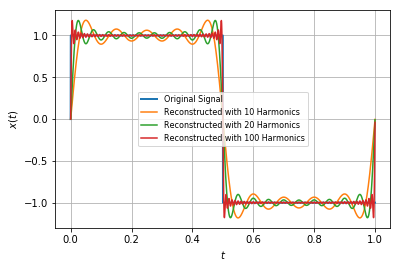

In [5]:
t_period = np.arange(0, 1, 1/Fs)
F = fourierseries(square_wave(t_period), 100)
plt.plot(t_period, square_wave(t_period), label='Original Signal', lw=2)
plt.plot(t_period, reconstruct(len(t_period), F[:10,:]), label='Reconstructed with 10 Harmonics');
plt.plot(t_period, reconstruct(len(t_period), F[:20,:]), label='Reconstructed with 20 Harmonics');
plt.plot(t_period, reconstruct(len(t_period), F[:100,:]), label='Reconstructed with 100 Harmonics');

plt.grid(True); plt.ylabel('$x(t)$'); plt.xlabel('$t$');
plt.legend(fontsize=8);

As we can see, the reconstructed signal roughly follows the original, and the more harmonics used, the better. However, we also see that the reconstructed signal is not exact. Instead, the reconstructed signal significantly fluctuates near the edges of the square wave.
As an aside, this phenomenon is called Gibbs Phenomenon and describes the fact that the Fourier series has large oscillations around jump discontinuities. In particular, the height of overshooting or undershooting does not depend on the number of harmonics and is roughly 9% of the jump height.
However, the duration of the oscillations decreases with the number of harmonics, eventually leading to a correct approximation in the limit for infinitely many harmonics.

## The Complex Fourier Series

Now lets continue further and write the Fourier Series in a different form by replacing the sum of sine and cosine with exponential terms:

( $j$ is the imaginary number here)

$$\begin{align}f(t)&=\frac{a_0}{2}+\sum_{n=1}^\infty a_n\cos(\frac{2\pi nt}{T})+b_n\sin(\frac{2\pi nt}{T})\\
&=\frac{a_0}{2}+\sum_{n=1}^\infty \frac{a_n-jb_n}{2}\exp(j\frac{2\pi nt}{T}) + \frac{a_n+jb_n}{2}\exp(-j\frac{2\pi nt}{T})\end{align}$$

Now set $$c_n=\begin{cases}\frac{a_n-jb_n}{2} & n > 0\\\frac{a_0}{2} & n=0 \\ \frac{a_n+jb_n}{2} & c < 0\end{cases},$$

so that we can write the Fourier Series as:

$$f(t)=\sum_{n=-\infty}^{\infty}c_n\exp(j\frac{2\pi nt}{T}).$$

The calculation of the coefficients $c_n$ is straight-forward:

$$\begin{align}c_n = \frac{a_n-jb_n}{2}&=\frac{1}{2}\left[\frac{2}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}f(t)\cos(\frac{2\pi nt}{T})dt-j\frac{2}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}f(t)\sin(\frac{2\pi nt}{T})dt\right]\\&=\frac{1}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}f(t)[\cos(\frac{2\pi nt}{T})-j\sin(\frac{2\pi nt}{T})]dt\\&=\frac{1}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}f(t)\exp(-j\frac{2\pi nt}{T})dt\end{align}$$

So, the formulation for the Fourier series is:

$$\begin{align}f(t)&=\sum_{n=-\infty}^{\infty}c_n\exp(j\frac{2\pi nt}{T})\\
\text{with }c_n&=\int_{-\frac{T}{2}}^{\frac{T}{2}}f(t)\exp(-j\frac{2\pi nt}{T})dt.\end{align}$$

for $n>0$. We get exactly the same expression for $n\leq 0$.

We can verify this numerically by calculating the Fourier Series coefficients $a_n,b_n$ and $c_n$ of another square wave.

In [6]:
"""Calculate the FS coefficients a_n, b_n up to the Nth harmonic"""
def fourierseries_anbn(period, N):
    result = []
    T = len(period)
    t = np.arange(T)
    for n in range(N+1):
        an = 2/T*(period * np.cos(2*np.pi*n*t/T)).sum()
        bn = 2/T*(period * np.sin(2*np.pi*n*t/T)).sum()
        result.append((an, bn))
    return np.array(result)

"""Calculate the FS coefficient c_n to the Nth harmonic"""
def fourierseries_cn(period, N):
    result = []
    T = len(period)
    t = np.arange(T)
    for n in range(N+1):
        c_plusn = 1/T * (period * np.exp(-2j*np.pi*n*t/T)).sum()
        c_minusn = 1/T * (period * np.exp(2j*np.pi*n*t/T)).sum()
        result.append((c_plusn, c_minusn))
    return np.array(result)

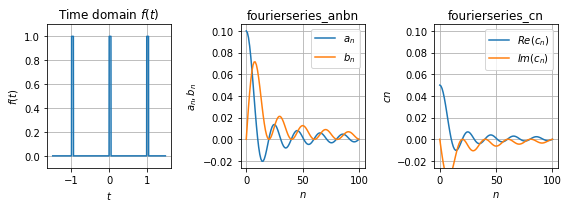

In [7]:
"""rect function"""
f = lambda t: (abs(t % 1)<0.05).astype(float)
t = np.arange(-1.5, 1.5, 0.001)
plt.figure(figsize=(8,3))
plt.subplot(131) 
plt.plot(t, f(t))
plt.ylim((-0.1, 1.1)); plt.title('Time domain $f(t)$'); plt.xlabel('$t$'); plt.ylabel('$f(t)$'); plt.grid(True)

t_period = np.arange(0, 1, 0.001)
period = f(t_period)
anbn = fourierseries_anbn(period, 100)
cn = fourierseries_cn(period, 100)

plt.subplot(132)
plt.plot(anbn[:,0], label='$a_n$')
plt.plot(anbn[:,1], label='$b_n$')
plt.grid(True); plt.xlabel('$n$'); plt.ylabel('$a_n,b_n$'); plt.title('fourierseries_anbn'); plt.legend(fontsize=10)
yl = plt.gca().get_ylim()

plt.subplot(133)
plt.plot(cn[:,0].real, label='$Re(c_n)$')
plt.plot(cn[:,0].imag, label='$Im(c_n)$')
plt.grid(True); plt.xlabel('$n$'); plt.ylabel('$cn$'); plt.title('fourierseries_cn'); plt.legend(fontsize=10)
plt.ylim(yl)

plt.tight_layout()

## Using the Fourier Series to Create the Fourier Transform

$$
\begin{align} &\text{Fourier Series:}&x(t)&=\sum_{n=-\infty}^{\infty}c_n\exp(j2\pi \frac{n}{T}t) &c_n&=\int_{-\frac{T}{2}}^{\frac{T}{2}}x(t)\exp(-j2\pi \frac{n}{T}t)dt\end{align}
$$

It's time to finally relate the Fourier Series to the Fourier Transform, which will be more useful to us for the following reasons:
$$
$$
The Fourier Transform can be applied for an aperiodic signal, whereas the Fourier series is used for a periodic signal with period $T$.
Furthermore, the Fourier Transform allows the signal $f(t)$ to consist of arbitrary frequencies $f$, whereas the periodic signal $f(t)$ in the Fourier Series only consists of harmonics of discrete frequency $f_n=\frac{n}{T}$.

### The Fourier Transform:
$$
\begin{align}x(t)&=\int_{-\infty}^{\infty}X(f)\exp(j2\pi ft)dt&X(f)&=\int_{-\infty}^{\infty}x(t)\exp(-j2\pi ft)dt&\end{align}
$$

To relate the Fourier Series to the Fourier Transform, lets rewrite the Fourier Series with using the Dirac Filter Property:
$$
$$
Operating on a signal with the delta function $\delta(t)$ at time t = $\tau$ means that the function only exists at that instant:

$$\int_{-\infty}^{\infty}x(t)\delta(t-\tau)dt=x(\tau)$$

Using this we can write:

$$x(t)=\int_{-\infty}^{\infty}X(f)\exp(j2\pi \frac{n}{T}t)df \text{ with }X(f)=\sum_{n=-\infty}^{\infty}c_n\delta(f-\frac{n}{T}).$$

##### The Fourier Series becomes the Fourier Transform when:
$$
T \rightarrow \infty, \qquad \omega_0,f_0 \rightarrow 0
$$

The expression for $x(t)$ is now equal to the inverse Fourier transform, and we can already identify $X(f)$ as the spectrum of the periodic $x(t)$. We see that $X(f)$ of the periodic signal is discrete (it is nonzero at only the harmonic frequencies). $\frac{n}{T}$. The difference between the discrete frequencies is $\frac{1}{T}$ (it decreases with larger period lengths). If we now eventually assume $T\rightarrow\infty$ (we let the period duration of the signal become infinite), we directly end up with the expression for the Fourier transform, because 

$$\lim_{T\rightarrow\infty}\sum_{n=-\infty}^{\infty}c_n\delta(f-\frac{n}{T})$$

becomes a continuous function of $f$, since the Diracs $\delta(t)$ get closer and closer together, eventually merging to a smooth function. 

Let us eventually verify this relation numerically: We take a single rectangular pulse and increase its period's length, i.e. we keep the length of the rect pulse constant, but increase the distance between the pulses, eventually leading to a single, aperiodic pulse, when the period duration becomes infinite:

In [8]:
def compareserieswithtransform(T):
    Fs = 1000
    t = np.arange(0, 100, 1/Fs)
    t_period = np.arange(0, T, 1/Fs)
    x_p = lambda t: (abs((t % T)-0.5) <= 0.5).astype(float)
    x = lambda t: (abs(t-0.5) <= 0.5).astype(float)
    plt.gcf().clear()
    plt.subplot(121)
    plt.plot(t, x_p(t))
    plt.annotate(xy=(0, -0.02), xytext=(T, -0.02), s='', arrowprops=dict(arrowstyle='<->', shrinkA=0, shrinkB=0))
    plt.text(T/2, -0.02, '$T$', va='top', ha='center')
    plt.ylim((-0.1, 1.1)); plt.xlim((0, 15)); plt.ylabel('$x(t)$'); plt.xlabel('$t$')
    
    cn = fourierseries_cn(x_p(t_period), 100)[:,0]
    f_discrete = np.arange(len(cn))/T
    
    f = np.linspace(0, Fs, len(t), endpoint=False)
    X = np.fft.fft(x(t))/Fs
    plt.subplot(122)
    plt.plot(f, abs(X), label='Fourier Tr. of rect')
    plt.stem(f_discrete, abs(cn*T), label='Fourier Series $c_n$')
    plt.xlim((0, 4))
    plt.xlabel('$f$'); plt.ylabel('$c_n, X(f)$'); plt.grid(True); plt.title('Frequency domain'); plt.legend(fontsize=10);
    
    plt.tight_layout(); showInInteract()

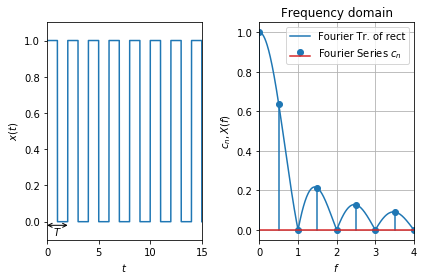

In [9]:
compareserieswithtransform(2)

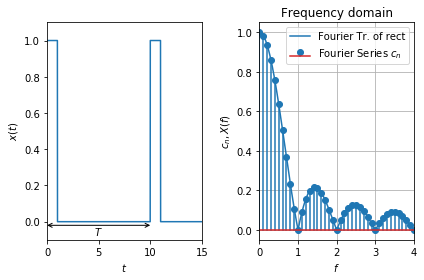

In [10]:
compareserieswithtransform(10)

In [11]:
interact(compareserieswithtransform, T=(1, 25, 1))

interactive(children=(IntSlider(value=13, description='T', max=25, min=1), Output()), _dom_classes=('widget-in…

<function __main__.compareserieswithtransform(T)>

## The Fast Fourier Transform (FFT)

The Fast Fourier Transform is a way of performing a Fourier Transform in O(nlogn) time instead of the standard O(n$^2$) time. FFT employs a divide and conquer approach that breaks the n point transform into two n/2 point transforms, resulting in log2(n) recursive steps with O(n) work occuring at each one in order to merge these transformations in much the same manner merge sort or quick sort is able to beat out insertion sort via the same method, reducing until a single term.
\begin{align}
X_k &= \sum_{n=0}^{N-1} x_n \cdot e^{-i~2\pi~k~n~/~N} \\
    &= \sum_{m=0}^{N/2 - 1} x_{2m} \cdot e^{-i~2\pi~k~(2m)~/~N} + \sum_{m=0}^{N/2 - 1} x_{2m + 1} \cdot e^{-i~2\pi~k~(2m + 1)~/~N} \\
    &= \sum_{m=0}^{N/2 - 1} x_{2m} \cdot e^{-i~2\pi~k~m~/~(N/2)} + e^{-i~2\pi~k~/~N} \sum_{m=0}^{N/2 - 1} x_{2m + 1} \cdot e^{-i~2\pi~k~m~/~(N/2)}
\end{align}

# Defining the Chebyshev and Fast Chevychev

In [12]:
from numpy import pi,cos,arange,ones,tile,dot,eye,diag
def cheb(N):
    '''Chebushev polynomial differentiation matrix.
       Ref.: Trefethen's 'Spectral Methods in MATLAB' book.
    '''
    x      = cos(pi*arange(0,N+1)/N)
    if N%2 == 0:
        x[N//2] = 0.0 # only when N is even!
    c      = ones(N+1); c[0] = 2.0; c[N] = 2.0
    c      = c * (-1.0)**arange(0,N+1)
    c      = c.reshape(N+1,1)
    X      = tile(x.reshape(N+1,1), (1,N+1))
    dX     = X - X.T
    D      = dot(c, 1.0/c.T) / (dX+eye(N+1))
    D      = D - diag( D.sum(axis=1) )
    return D,x

from numpy import array, flipud,real,zeros, sqrt
from numpy.fft import fft
from numpy.fft.fftpack import ifft

def chebfft(v):
    '''Chebyshev differentiation via fft.
       Ref.: Trefethen's 'Spectral Methods in MATLAB' book.
    '''
    N = len(v)-1
    if N == 0:
        w = 0.0 # only when N is even!
        return w
    x  = cos(pi*arange(0,N+1)/N)
    ii = arange(0,N)
    V = flipud(v[1:N]); V = list(v) + list(V);
    U = real(fft(V))
    b = list(ii); b.append(0); b = b + list(arange(1-N,0));
    w_hat = 1j*array(b)
    w_hat = w_hat * U
    W = real(ifft(w_hat))
    w = zeros(N+1)
    w[1:N] = -W[1:N]/sqrt(1-x[1:N]**2)
    w[0] = sum(ii**2*U[ii])/N + 0.5*N*U[N]
    w[N] = sum((-1)**(ii+1)*ii**2*U[ii])/N + \
              0.5*(-1)**(N+1)*N*U[N]
    return w

# Comparing errros between Chebychev and Fast Chebychev (Chebychev with FFT improvements)
Note all results are exactly the same.

In [13]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import pi,linspace,sin,cos,exp,round,zeros,arange,real, flipud, dot
from numpy.fft import fft,ifft
from matplotlib.pyplot import figure,subplot,plot,grid,title,axis

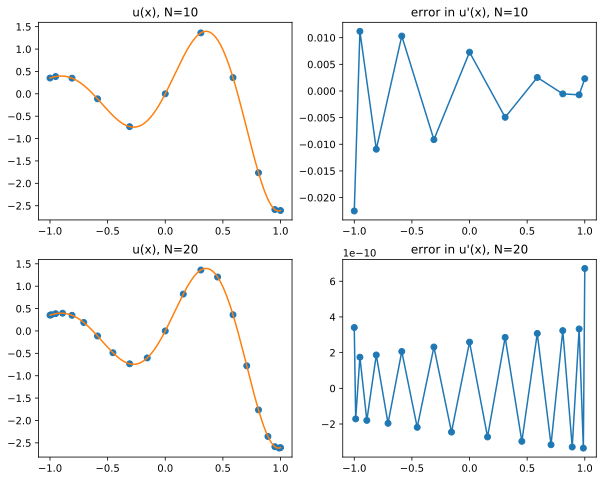

In [14]:
xx = linspace(-1.0,1.0,200,True)
uu = exp(xx)*sin(5.0*xx)
c = 1; figure(figsize=(10,8))
for N in [10,20]:
    D,x = cheb(N); u = exp(x)*sin(5.0*x)
    subplot(2,2,c); c += 1
    plot(x,u,'o',xx,uu)
    title('u(x), N='+str(N))
    
    error = dot(D,u) - exp(x)*(sin(5.0*x)+5.0*cos(5.0*x))
    subplot(2,2,c); c += 1
    plot(x,error,'o-')
    title('error in u\'(x), N='+str(N))

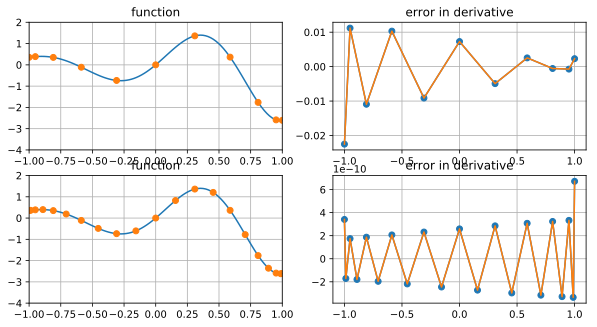

In [15]:
figure(figsize=(10,8))
plot_count = 1

for N in [10,20]:
    xx = linspace(-1.0,1.0,100)
    ff = exp(xx)*sin(5*xx)
    x = cos(arange(0,N+1)*pi/N)
    f = exp(x)*sin(5*x)
    error = chebfft(f) - exp(x)*(sin(5*x)+5*cos(5*x))
    subplot(3,2,plot_count)
    plot_count +=1
    plot(xx,ff,'-',x,f,'o')
    grid(True)
    axis([-1, 1, -4,2])
    title('function')
    subplot(3,2,plot_count)
    plot_count +=1
    plot(x,error,'-o')
    title('error in derivative')
    plot(x,error) 
    grid(True)

# Time analysis of Chebychev vs Fast Chebychev

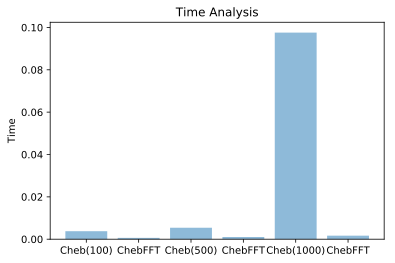

In [30]:
import time
#t0 = time.time()
#code
#t1 = time.time()
#time elapsed = t1 - t0

#we want to run 3 functions 3 times each (with increasing n) with cheb and chebfft and plot the times in a bar graph, plotting time elapsed/n
#something like function 1 graph
#                                         |              
#                     |                   |             
#  |                  |                   |       |
#  |        |         |       |           |       |        
#n1cheb n1chebfft   n2chb n2chebff1    n3cheb n3chebfft
#and so on for all 3 functions. We should see cheb O(n^3) and chebfftO(nlogn)


ta = time.perf_counter()
D,x = cheb(100)
u = exp(x)*sin(5.0*x)
dummy0 = dot(D,u)
tb = time.perf_counter()
tcheb0 = tb-ta

ta = time.perf_counter()
D,x = cheb(500)
u = exp(x)*sin(5.0*x)
dummy1 = dot(D,u)
tb = time.perf_counter()
tcheb1 = tb-ta

ta = time.perf_counter()
D,x = cheb(1000)
u = exp(x)*sin(5.0*x)
dummy2 = dot(D,u)
tb = time.perf_counter()
tcheb2 = tb-ta

N = 100
ta = time.perf_counter()
x = cos(arange(0,N+1)*pi/N)
f = exp(x)*sin(5*x)
dummy3 = chebfft(f)
tb = time.perf_counter()
tchebfft0 = tb-ta

N = 500
ta = time.perf_counter()
x = cos(arange(0,N+1)*pi/N)
f = exp(x)*sin(5*x)
dummy4 = chebfft(f)
tb = time.perf_counter()
tchebfft1 = tb-ta

N = 1000
u = exp(x)*sin(5.0*x)
ta = time.perf_counter()
x = cos(arange(0,N+1)*pi/N)
f = exp(x)*sin(5*x)
dummy5 = chebfft(f)
tb = time.perf_counter()
tchebfft2 = tb-ta

ta = time.perf_counter()
D,x = cheb(100)
u = exp(10)*cos(5*x)
dummy0 = dot(D,u)
tb = time.perf_counter()
tcheb10 = tb-ta

ta = time.perf_counter()
D,x = cheb(500)
u = exp(10)*cos(5*x)
dummy1 = dot(D,u)
tb = time.perf_counter()
tcheb11 = tb-ta

ta = time.perf_counter()
D,x = cheb(1000)
u = exp(10)*cos(5*x)
dummy2 = dot(D,u)
tb = time.perf_counter()
tcheb12 = tb-ta

N = 100
ta = time.perf_counter()
x = cos(arange(0,N+1)*pi/N)
f = exp(10)*cos(5*x)
dummy3 = chebfft(f)
tb = time.perf_counter()
tchebfft10 = tb-ta

N = 500
ta = time.perf_counter()
x = cos(arange(0,N+1)*pi/N)
f = exp(10)*cos(5*x)
dummy4 = chebfft(f)
tb = time.perf_counter()
tchebfft11 = tb-ta

N = 1000
u = exp(x)*sin(5.0*x)
ta = time.perf_counter()
x = cos(arange(0,N+1)*pi/N)
f = exp(10)*cos(5*x)
dummy5 = chebfft(f)
tb = time.perf_counter()
tchebfft12 = tb-ta

ta = time.perf_counter()
D,x = cheb(100)
u = 5*x*cos(x)*sin(x)
dummy0 = dot(D,u)
tb = time.perf_counter()
tcheb20 = tb-ta

ta = time.perf_counter()
D,x = cheb(500)
u = 5*x*cos(x)*sin(x)
dummy1 = dot(D,u)
tb = time.perf_counter()
tcheb21 = tb-ta

ta = time.perf_counter()
D,x = cheb(1000)
u = 5*x*cos(x)*sin(x)
dummy2 = dot(D,u)
tb = time.perf_counter()
tcheb22 = tb-ta

N = 100
ta = time.perf_counter()
x = cos(arange(0,N+1)*pi/N)
f = 5*x*cos(x)*sin(x)
dummy3 = chebfft(f)
tb = time.perf_counter()
tchebfft20 = tb-ta

N = 500
ta = time.perf_counter()
x = cos(arange(0,N+1)*pi/N)
f = 5*x*cos(x)*sin(x)
dummy4 = chebfft(f)
tb = time.perf_counter()
tchebfft21 = tb-ta

N = 1000
u = exp(x)*sin(5.0*x)
ta = time.perf_counter()
x = cos(arange(0,N+1)*pi/N)
f = 5*x*cos(x)*sin(x)
dummy5 = chebfft(f)
tb = time.perf_counter()
tchebfft22 = tb-ta


objects = ('Cheb(100)', 'ChebFFT', 'Cheb(500)', 'ChebFFT', 'Cheb(1000)', 'ChebFFT')
y_pos = np.arange(len(objects))
performance = [tcheb0,tchebfft0,tcheb1,tchebfft1,tcheb2,tchebfft2]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Time')
plt.title('Time Analysis')
plt.show()

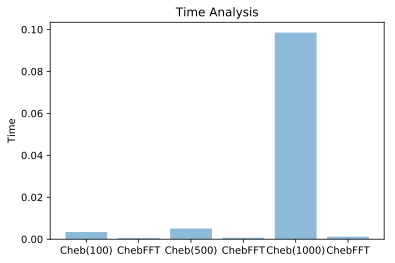

In [31]:
objects = ('Cheb(100)', 'ChebFFT', 'Cheb(500)', 'ChebFFT', 'Cheb(1000)', 'ChebFFT')
y_pos = np.arange(len(objects))
performance = [tcheb10,tchebfft10,tcheb11,tchebfft11,tcheb12,tchebfft12]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Time')
plt.title('Time Analysis')
plt.show()

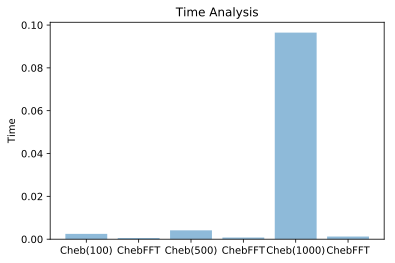

In [32]:
objects = ('Cheb(100)', 'ChebFFT', 'Cheb(500)', 'ChebFFT', 'Cheb(1000)', 'ChebFFT')
y_pos = np.arange(len(objects))
performance = [tcheb20,tchebfft20,tcheb21,tchebfft21,tcheb22,tchebfft22]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Time')
plt.title('Time Analysis')
plt.show()